In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3, style='ticks')


In [2]:
#Specify model/results folders

train_dir = '/home/drk/seqnn/data/models/v2'
num_folds = len(glob.glob('%s/f*c0' % train_dir))

#Padding for drawing text annotations to plot(s)
eps = 0.03


In [3]:
#Read target descriptions

fold0_acc_file = '%s/f0c0/test0/acc.txt' % (train_dir)
fold0_acc_df = pd.read_csv(fold0_acc_file, sep='\t', index_col=0)

#Get experimental assay strings
descriptions = fold0_acc_df.description
experiments = pd.Series([desc.split(':')[0] for desc in descriptions])
experiments.value_counts()


CHIP     3886
RNA      1543
CAGE     1276
DNASE     674
ATAC      232
dtype: int64

In [4]:
#Read bin-level test set accuracies

fold_accs = []

#Loop over folds
for fi in range(num_folds):
    fold_acc_file = '%s/f%dc0/test0/acc.txt' % (train_dir,fi)
    
    #Load file and append vector of pearson correlations
    fold_acc_df = pd.read_csv(fold_acc_file, sep='\t', index_col=0)
    fold_accs.append(fold_acc_df.pearsonr)

#Average across folds
fold_accs = np.array(fold_accs)
mean_accs = fold_accs.mean(axis=0)
fold_accs.shape


(4, 7611)

Text(0.03, 0.97, 'Mean 0.799')

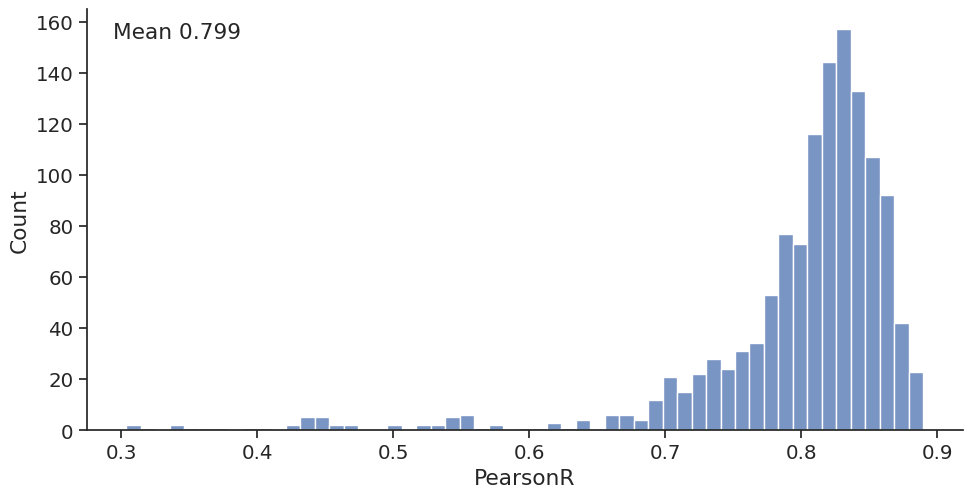

In [5]:
#CAGE

cage_mask = (experiments=='CAGE')
sns.displot(mean_accs[cage_mask], aspect=2)
plt.gca().set_xlabel('PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_accs[cage_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)


Text(0.03, 0.97, 'Mean 0.831')

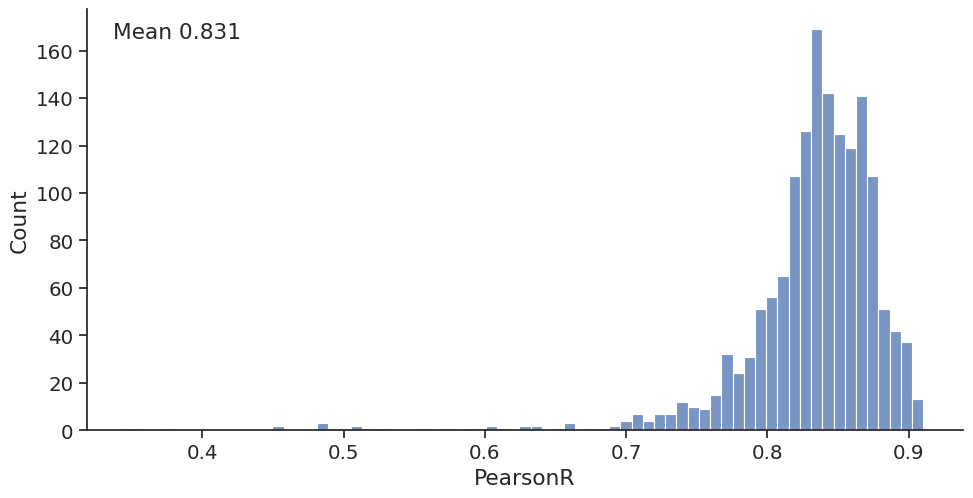

In [8]:
#RNA

rna_mask = (experiments=='RNA')
sns.displot(mean_accs[rna_mask], aspect=2)
plt.gca().set_xlabel('PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_accs[rna_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)


Text(0.03, 0.97, 'Mean 0.870')

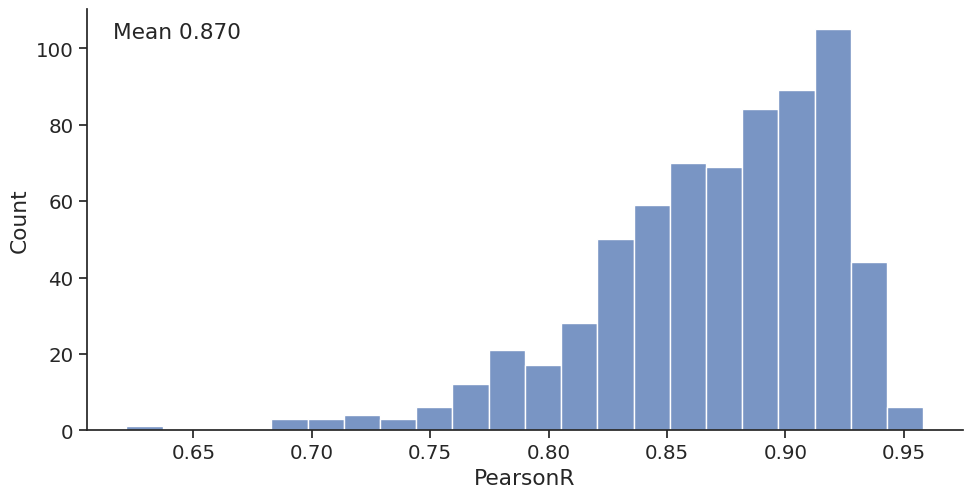

In [11]:
#DNase

dnase_mask = (experiments=='DNASE')
sns.displot(mean_accs[dnase_mask], aspect=2)
plt.gca().set_xlabel('PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_accs[dnase_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)


Text(0.03, 0.97, 'Mean 0.577')

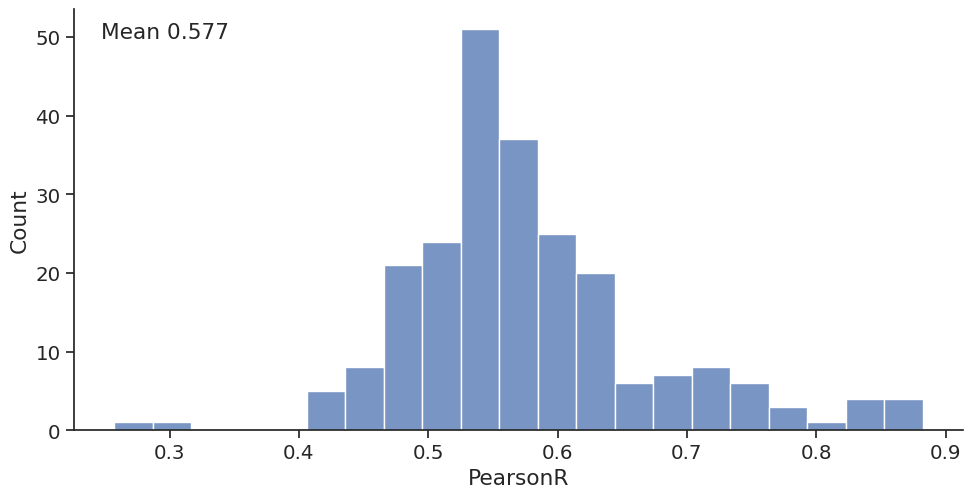

In [14]:
#ATAC

atac_mask = (experiments=='ATAC')
sns.displot(mean_accs[atac_mask], aspect=2)
plt.gca().set_xlabel('PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_accs[atac_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)


Text(0.03, 0.97, 'Mean 0.640')

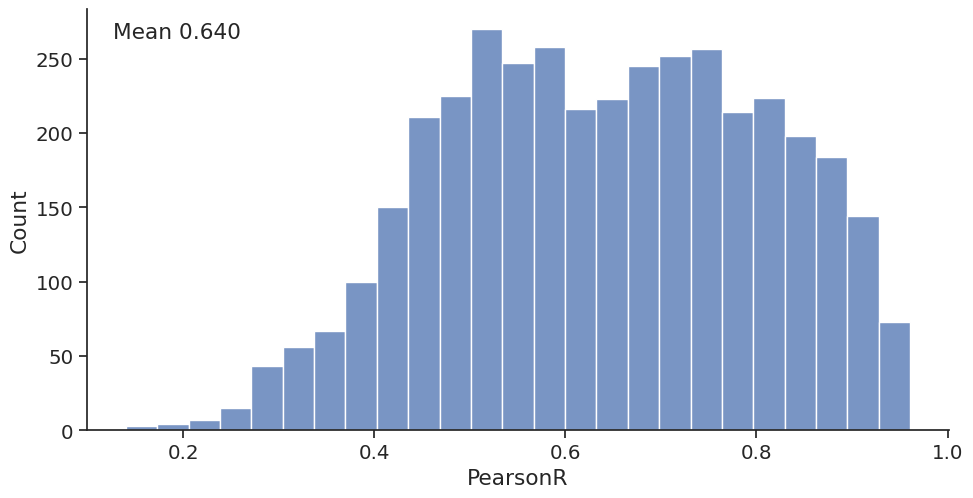

In [17]:
#ChIP

chip_mask = (experiments=='CHIP')
sns.displot(mean_accs[chip_mask], aspect=2)
plt.gca().set_xlabel('PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_accs[chip_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)


In [20]:
#Print ChIP experiment sub-types

chip_targets = pd.Series([desc.split(':')[1].upper() for desc in descriptions[chip_mask]])
chip_targets.value_counts().head(20)


H3K4ME3            339
H3K36ME3           269
H3K27ME3           260
H3K4ME1            260
H3K9ME3            252
H3K27AC            229
CTCF               207
H3K9AC              98
POLR2A              85
EP300               54
H2AFZ               45
POLR2APHOSPHOS5     45
H3K4ME2             41
H3K79ME2            36
H4K20ME1            36
REST                22
EZH2                19
CEBPB               18
H3K9ME2             16
H3F3A               16
dtype: int64

Text(0.03, 0.97, 'Mean 0.714')

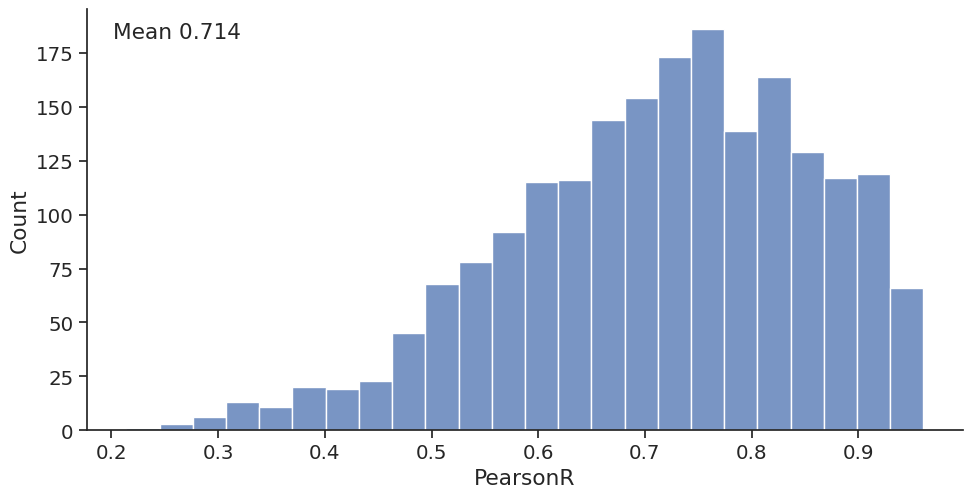

In [21]:
#CHIP histone

chiphist_mask = np.array([desc.startswith('CHIP:H2') or desc.startswith('CHIP:H3') or desc.startswith('CHIP:H4') for desc in descriptions])
sns.displot(mean_accs[chiphist_mask], aspect=2)
plt.gca().set_xlabel('PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_accs[chiphist_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)


Text(0.03, 0.97, 'Mean 0.562')

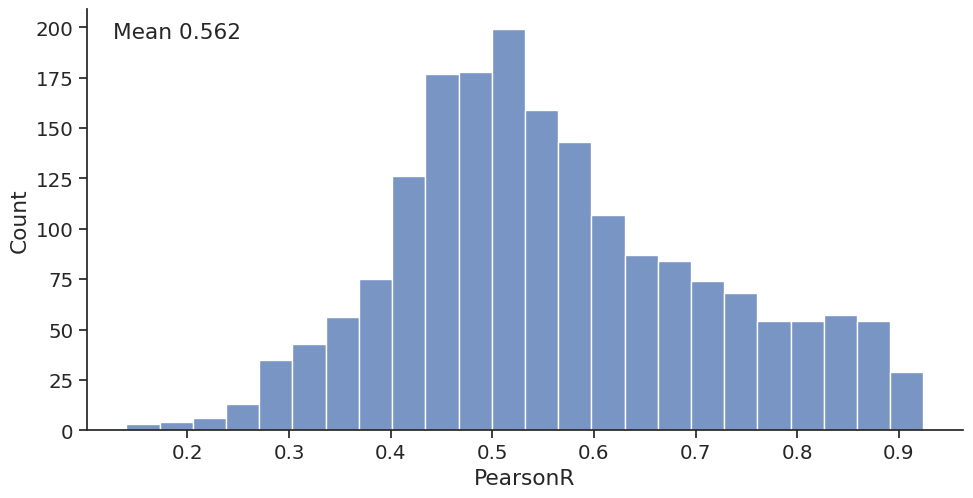

In [23]:
#CHIP TF

chiptf_mask = chip_mask & (~chiphist_mask)
sns.displot(mean_accs[chiptf_mask], aspect=2)
plt.gca().set_xlabel('PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_accs[chiptf_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)


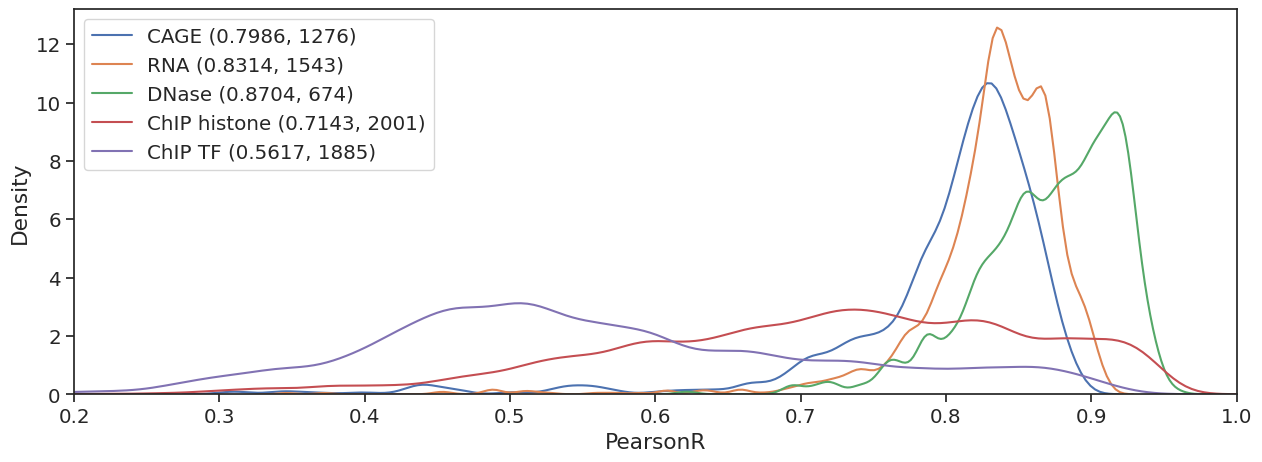

In [25]:
#Plot joint density plot of all experiment assay types

bwa = 0.5
plt.figure(figsize=(15,5))
sns.kdeplot(mean_accs[cage_mask], bw_adjust=bwa,
            label='CAGE (%.4f, %d)' % (mean_accs[cage_mask].mean(), cage_mask.sum()))
sns.kdeplot(mean_accs[rna_mask], bw_adjust=bwa,
            label='RNA (%.4f, %d)' % (mean_accs[rna_mask].mean(), rna_mask.sum()))
sns.kdeplot(mean_accs[dnase_mask], bw_adjust=bwa,
            label='DNase (%.4f, %d)' % (mean_accs[dnase_mask].mean(), dnase_mask.sum()))
sns.kdeplot(mean_accs[chiphist_mask], bw_adjust=bwa,
            label='ChIP histone (%.4f, %d)' % (mean_accs[chiphist_mask].mean(), chiphist_mask.sum()))
sns.kdeplot(mean_accs[chiptf_mask], bw_adjust=bwa,
            label='ChIP TF (%.4f, %d)' % (mean_accs[chiptf_mask].mean(), chiptf_mask.sum()))

plt.gca().set_xlim(0.2,1)
plt.gca().set_xlabel('PearsonR')

plt.legend()

plt.savefig('acc_kde1.pdf')
